# Información tabular: introducción a `pandas`

Si has buscado información sobre el uso de `Python` para el manejo de datos, seguramente te has topado con el nombre `pandas`. `pandas` es el nombre de uno de los módulos más indispensables, que da métodos y herramientas para el procesamiento de información tabular. Fue creada en 2008 por Wes McKinney, por lo que a estas alturas ya es un módulo sumamente maduro. Como en muchos otros problemas de programación, **Stack Overflow** es el primer sitio donde puedes buscar ayuda sobre tus problemas. Algunos libros recomendados son **Python for Data Analysis** y **Learning the Pandas Library** (ambos en el canal de lecturas recomendadas), aunque por supuesto no hay mejor sitio para consultar tus dudas sobre cómo usar una función o método que la propia documentación de la librería.

Sin más preámbulo, exploremos las estructuras más básicas y vayamos escalando en complejidad.

In [1]:
import pandas as pd

## La base: `pd.Series`

Recordarás que en la primera sesión hablamos del tipo `pd.Series`. Es la base en `pandas`, y es la cruza entre una lista y un diccionario. Los ítems que las conforman están almacenadas en orden, y hay etiquetas para recuperarlos. Los elementos de una serie son:

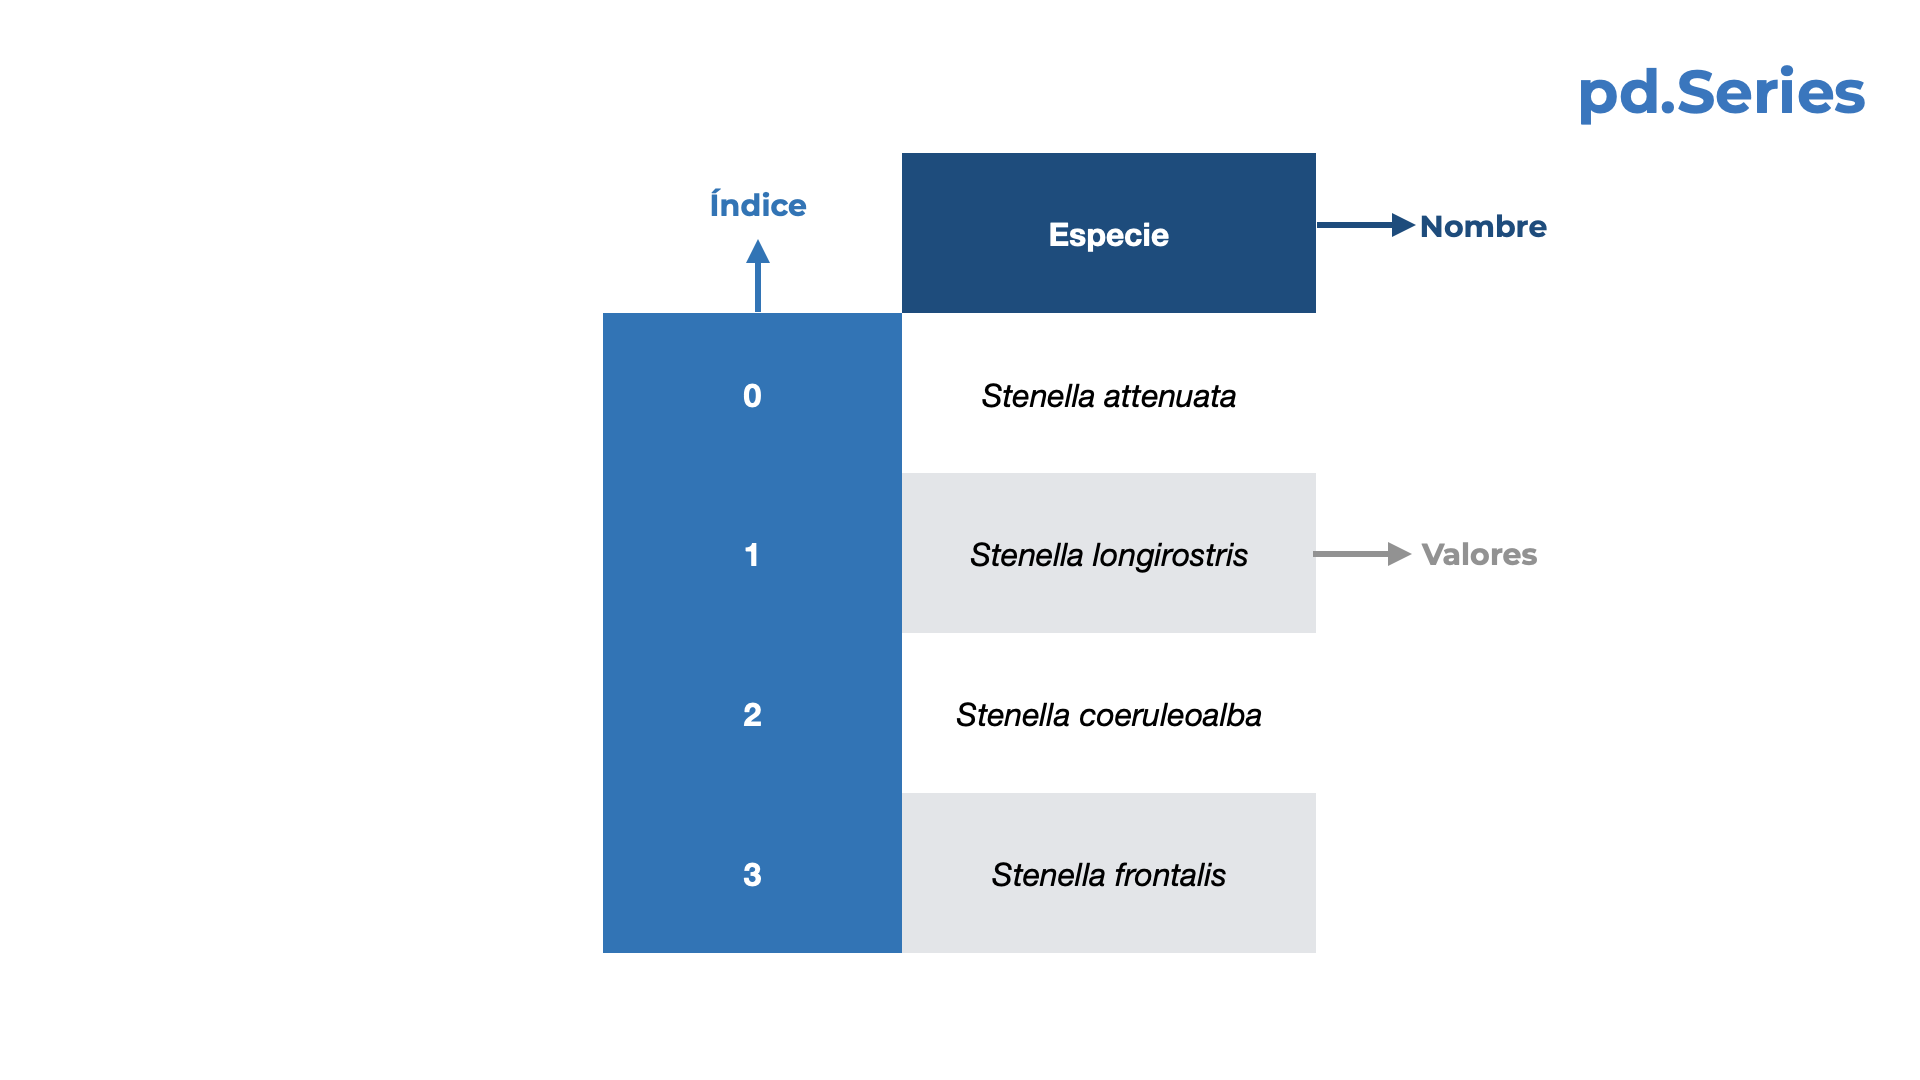

Para crearlas solo pasaremos una lista de valores. Al hacerlo así, `pandas` automáticamente asigna un índice (`index`), y establece el nombre de la serie como `None`.

Como toda función, siempre es recomendable ver la ayuda antes de comenzar a utilizarla:

In [2]:
pd.Series?

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype=None,
    name=None,
    copy=False,
    fastpath=False,
)
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series.

    .. versionchanged:: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : array-like or Index (1d)
    Values must 

### Creación

Creemos entonces una serie utilizando la lista de especies de la diapositiva:

In [3]:
especies = ['Stenella attenuata', 'Stenella longirostris',
            'Stenella coeruleoalba', 'Stenella frontalis']
pd.Series(especies)

0       Stenella attenuata
1    Stenella longirostris
2    Stenella coeruleoalba
3       Stenella frontalis
dtype: object

Podemos pasar también un diccionario, en cuyo caso las claves pasan a formar el índice:

In [6]:
especies = {'Stenella': 'attenuata',
            'Orcinus': 'orca',
            'Lagenorhynchus': 'obliquidens',
            'Pseudorca': 'crassidens'
            }
s = pd.Series(especies)
s

Stenella            attenuata
Orcinus                  orca
Lagenorhynchus    obliquidens
Pseudorca          crassidens
dtype: object

Podemos obtener los índices con el **atributo** `index`:

In [7]:
s.index

Index(['Stenella', 'Orcinus', 'Lagenorhynchus', 'Pseudorca'], dtype='object')

Y los valores con `values`:

In [8]:
s.values

array(['attenuata', 'orca', 'obliquidens', 'crassidens'], dtype=object)

Otra forma es pasar el índice de manera explícita como una lista (o tuple):

In [9]:
s = pd.Series(['attenuata', 'orca', 'obliquidens', 'crassidens'],
              index = ['Stenella', 'Orcinus', 'Lagenorhynchus', 'Pseudorca'])
s

Stenella            attenuata
Orcinus                  orca
Lagenorhynchus    obliquidens
Pseudorca          crassidens
dtype: object

### Indización/consulta

Podemos acceder a los elementos de una serie ya sea por posición o etiqueta del índice. ¿Qué pasa si no le das un índice a la serie? En ese caso tanto la posición como la etiqueta son iguales; sin embargo, es importante tener en cuenta que:

- Para indizar por ubicación numérica, empezaremos en 0 y utilizaremos el atributo `.iloc`
- Para indizar por la etiqueta del índice, utilizaremos el atributo `.loc`.

Es importante notar que tanto `.iloc` como `.loc` son atributos, por lo que se indizan con `[]`:

In [10]:
s.iloc[3]

'crassidens'

In [11]:
s.loc['Pseudorca']

'crassidens'

Podemos indizar de manera directa:

In [12]:
s[3]

'crassidens'

In [13]:
s['Pseudorca']

'crassidens'

¿Por qué utilizar entonces los atributos? Para evitar errores. Tomemos la siguiente serie:

In [14]:
abund = pd.Series({100: 'Stenella',
                   101: 'Orcinus',
                   102: 'Lagenorhynchus',
                   103: 'Pseudorca'})

Si intentamos indizarla como `abund[0]` vamos a tener un error (`KeyError: 0`), ya que no llamará a `abund.iloc[0]` como nosotros esperamos, sino que buscará la entrada cuyo índice sea 0, que no existe en la colección.

In [1]:
#abund[0]

¿Mi recomendación? Procura utilizar `.iloc` y `.loc` para evitar confusiones y sorpresas. Otra cosa a tener en cuenta es que el atributo `.loc` permite no solo indizar, sino también añadir nueva información. Si el valor pasado como índice no existe, genera una nueva entrada. También es relevante mencionar que los índices pueden a) tener valores repetidos y b) tener tipos mixtos. En este último caso, `pandas` automáticamente cambia los tipos de `NumPy` según sea necesario. Volviendo a nuestra Serie `abund`, añadamos una nueva entrada donde el índice sea `Stenella` y el valor `attenuata`:

In [48]:
s.loc['Stenella'] = 'attenuata'
s

0                 102
1                 102
2                 102
3                 102
4                 102
              ...    
49996           103.5
49997           103.5
49998           103.5
49999           103.5
Stenella    attenuata
Length: 50001, dtype: object

### Operaciones

Al ser colecciones de elementos, podemos pensar en iterar sobre la colección; sin embargo, esta aproximación es lenta. En su lugar tenemos aproximaciones **vectorizadas**, que son mucho más eficientes. Hagamos una comparación en la que el objetivo sea sumar cuatro números repetidos 10000 veces:

In [44]:
import numpy as np
s = pd.Series(np.repeat([100, 200, 120, 3., 101.5], 10000))
s

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
49995    101.5
49996    101.5
49997    101.5
49998    101.5
49999    101.5
Length: 50000, dtype: float64

Primero la aproximación iterativa. Para medir el tiempo utilizaremos la función "mágica" (así se les llama) `%%timeit -n 1000`; es decir, ejecutará el código 1000 veces y la salida será el tiempo total promedio por corrida y su desviación estándar:

In [45]:
%%timeit -n 1000
total = 0
for item in s:
    total+=item

4.57 ms ± 76.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Luego la aproximación vectorizada:

In [46]:
%%timeit -n 1000
np.sum(s)

109 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Notarás que es una diferencia muy importante. 112 **micro** segundos en la vectorizada vs. 4.63 **mili** segundos en la aproximación iterativa. Esta diferencia, además, se va a hacer más marcada entre más compleja sea la operación y más información tengamos. ¿Esto quiere decir que las iteraciones no vectorizadas no tienen lugar? En absoluto. Simplemente significa que, si podemos hacer nuestro código eficiente (y nos interesa el tiempo de ejecución), vale la pena buscar una alternativa vectorizada.

Además de esto, `pandas` permite "transmitir" (`broadcast`) una operación; es decir, aplicarla a cada valor en la serie mientras lo cambia:

In [47]:
s+=2 # Añade 2 a cada item y lo cambia
s.head()

0    102.0
1    102.0
2    102.0
3    102.0
4    102.0
dtype: float64

Como podrás imaginarte, esta estructura es el equivalente a una columna o renglón de una de una tabla y, de hecho, cada columna/renglón de un `DataFrame` es una serie.

## El objeto principal: `pd.DataFrame`

Si la serie es el objeto base, el principal es el `DataFrame`. Antes mencionamos que esta es una estructura bi-dimensional de Series, donde hay un índice y múltiples columnas de contenido (cada una con una etiqueta):

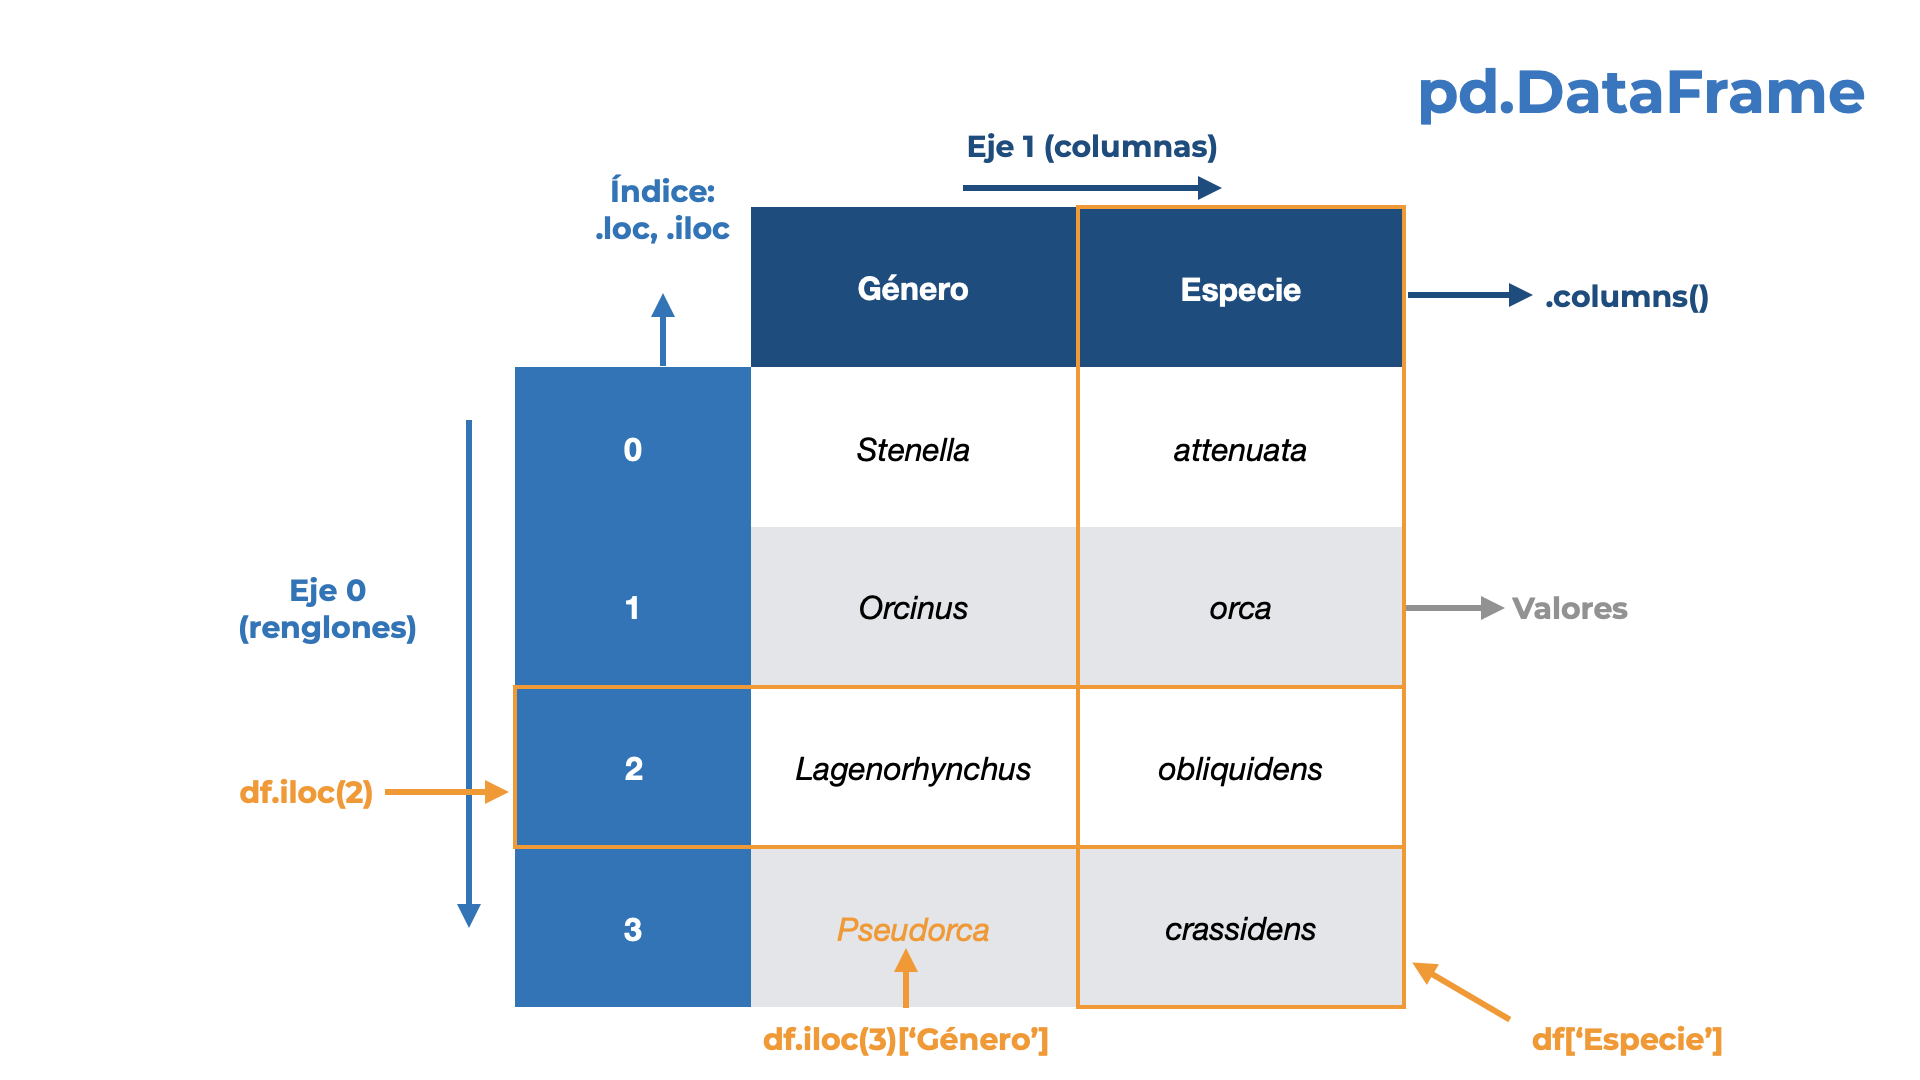

### Creación

Como puedes ver en la diapositiva, un `DataFrame` puede ser accesado de distintas maneras, pero primero veamos las formas de crearlo:

- Un grupo de Series, donde cada serie representa un renglón de los datos
- Un grupo de diccionarios, donde cada uno también representa un renglón de datos

Veamos un ejemplo:

In [73]:
auto1 = pd.Series({'Marca': 'Mazda',
                   'Modelo': 3,
                   'Motor': '2.5L'})
auto2 = pd.Series({'Marca': 'Mazda',
                   'Modelo': 2,
                   'Motor': '2.0L'})
auto3 = pd.Series({'Marca': 'Mazda',
                   'Modelo': 'CX-3',
                   'Motor': '2.0L'})
autos = pd.DataFrame([auto1, auto2, auto3],
                     index = ['Auto1', 'Auto2', 'Auto3'])
autos

,Marca,Modelo,Motor
Auto1,Mazda,3,2.5L
Auto2,Mazda,2,2.0L
Auto3,Mazda,CX-3,2.0L


Una forma más eficiente sería utilizando un diccionario, donde las claves correspondan a los nombres de las columnas, y los valores sean listas con los datos de cada columna:

In [86]:
autos = pd.DataFrame({'Marca': ['Mazda', 'Mazda', 'Mazda'],
                      'Modelo': [3, 2, 'CX3'],
                      'Motor': ['2.5L', '2.0L', '2.0L']},
                     index = ['Auto1', 'Auto2', 'Auto3'])
autos

,Marca,Modelo,Motor
Auto1,Mazda,3,2.5L
Auto2,Mazda,2,2.0L
Auto3,Mazda,CX3,2.0L


Similar a las Series, podemos extraer la información utilizando los atributos `.loc` y `.iloc`; sin embargo, ya que los DataFrames son bi-dimensionales, pasar un solo valor a `.loc` va a regresar una serie si solo hay un renglón a regresar

In [74]:
autos.loc['Auto2']

Marca     Mazda
Modelo        2
Motor      2.0L
Name: Auto2, dtype: object

Como habíamos mencionado, cada dimensión del DataFrame es una serie:

In [75]:
type(autos['Marca'])

pandas.core.series.Series

In [76]:
type(autos.loc['Auto2'])

pandas.core.series.Series

### Indización

Con esto también habrás notado que el operador de indización (`[]`) está reservado para el nombre de las columnas. ¿Y si quiero acceder por el número de columna? Entonces utilizamos el operador `.iloc`:

In [77]:
autos.iloc[:,1]

Auto1       3
Auto2       2
Auto3    CX-3
Name: Modelo, dtype: object

Ya que es un objeto bi-dimensional, podemos especificar qué elementos queremos extraer. En el ejemplo anterior quisimos extraer todos los renglones (operador `:`) de la segunda columna (recuerda, el valor del primer índice es 0) y por eso indicamos `[:, 1]`. Si queremos extraer solo un intervalo podemos hacerlo también (operador `i:f`):

In [78]:
autos.iloc[2, 0:2]

Marca     Mazda
Modelo     CX-3
Name: Auto3, dtype: object

En este ejemplo extrajimos el renglón número 3 (índice 2) y nos quedamos solo con los primeros tres elementos. ¿Cómo realizamos operaciones? Exactamente igual que con las Series. A final de cuentas, cada fragmento (`slice`) que obtengamos del DataFrame es una serie.

## Eliminar datos

Un poco más interesante y relevante es el cómo eliminar (drop) datos de series o DataFrames, aunque es sumamente sencillo: utilizando la función `drop`. Esta función, a diferencia de los métodos `append`, `insert` y `extend` para listas, NO cambia el objeto, sino que regresa una copia sin los renglones (o columnas) que se eliminaron:

In [79]:
autos.drop('Auto1')

,Marca,Modelo,Motor
Auto2,Mazda,2,2.0L
Auto3,Mazda,CX-3,2.0L


In [80]:
autos

,Marca,Modelo,Motor
Auto1,Mazda,3,2.5L
Auto2,Mazda,2,2.0L
Auto3,Mazda,CX-3,2.0L


Por esta razón, se recomienda primero crear una copia y luego realizar la eliminación:

In [81]:
autos_copia = autos.copy()
autos_copia = autos_copia.drop('Auto1')
autos_copia

,Marca,Modelo,Motor
Auto2,Mazda,2,2.0L
Auto3,Mazda,CX-3,2.0L


Aunque no se recomienda mas que para casos excepcionales, podemos utilizar el argumento `inplace = T` para no hacer la copia:

In [82]:
autos.drop('Auto2', inplace = True)
autos

,Marca,Modelo,Motor
Auto1,Mazda,3,2.5L
Auto3,Mazda,CX-3,2.0L


Otro parámetro interesante de la función es `axis`, en el cuál indicaremos en qué eje queremos realizar la eliminación. Por defecto trabaja sobre los renglones (`axis = 0` o `axis = 'index'`, aunque podemos trabajar también sobre las columnas (`axis = 1` o `axis = 'columns'`):

In [83]:
autos.drop('Modelo', axis = 'columns')

,Marca,Motor
Auto1,Mazda,2.5L
Auto3,Mazda,2.0L


## Cargar datos tabulares

Otro proceso sumamente cotidiano es el leer nuestros datos, almacenados en archivos de texto separados por comas o tabulaciones, u hojas de cálculo de Excel, por ejemplo. `pandas` cuenta con herramientas justo para eso. Carguemos los datos `fq.txt`, que contienen mediciones de parámetros fisicoquímicos en distintos sitios de muestreo. Este es un archivo separado por tabulaciones, por lo que utilizaremos la función `pd.read_table('data/fq.txt')`. Además, la primera columna contiene los identificadores de los sitios, por lo que debe asignarse al índice del `DataFrame`, lo cual haremos con el argumento `index_col = 0`:

In [94]:
fq = pd.read_table('data/fq.txt', index_col = 0)

Ahora veamos los primeros 6 elementos (el encabezado), con el método `.head()`:

In [95]:
fq.head()

,Temp,NH4,NO3,OD,Prof,Trans,Caud,SST,STD,PO4,DBO5,DQO
S1,16.9,0.78,1.83,7.50,27,30,1.01,10.0,86.9,0.6,23.27,29
S2,17.2,0.75,2.44,6.05,56,56,0.68,4.0,87.9,0.4,24.11,5
S3,17.4,1.25,1.60,5.84,37,29,1.53,6.5,101.5,0.6,20.63,15
S4,18.0,0.54,2.95,7.65,122,50,2.46,4.5,91.7,0.7,25.19,7
S5,19.2,0.88,2.70,4.07,137,18,6.58,50.0,95.7,0.2,24.83,16


Si quisiéramos cargar el archivo `da.csv`, que es un archivo separado por comas, lo haríamos con la función `pd.read_csv('data/da.csv'`). Este archivo contiene datos de longitud total a distintas edades de delfines. Aquí no hay un índice, por lo que no lo indicaremos al cargar los datos:

In [97]:
da = pd.read_csv('data/da.csv')
da.head()

,age,lt
0,0,111.168190
1,0,106.965427
2,0,110.136387
3,0,109.639519
4,0,112.362961


Con un archivo Excel es la misma historia (intenta adivinar la función), así que no lo demostraremos para no hacer el cuento largo. En su lugar, realicemos algunas operaciones comunes.

## Máscaras booleanas

Una máscara booleana es una forma elegante de llamarle a un filtro, que dará `True` si se cumple la condición especificada y `False` en caso contrario. Este filtro es un arreglo de datos (de 1 o 2 dimensiones) donde hay un valor booleano para cada valor de la columna o del renglón de interés. La idea es que ese filtro, esencialmente, se sobrepone a la estructura de datos de interés. Si el valor es `True`, el valor será extraído, si es `False`, no. Imaginemos que en `fq` nos interesa saber qué sitios tuvieron una temperatura menor a 20ºC. Para esto podemos hacer algo tan simple como:

In [99]:
fq['Temp'] < 20

S1      True
S2      True
S3      True
S4      True
S5      True
S6      True
S7      True
S8      True
S9      True
S10     True
S11     True
S12    False
S13    False
S14    False
S15    False
S16    False
S17    False
S18    False
S19    False
S20    False
S21    False
Name: Temp, dtype: bool

Pero podemos también extraer solo los sitios donde el resultado es `True`. Para esto primero podemos guardar la máscara (`mask`, una serie, en este caso) en un objeto y luego utilizar el método `.where(mask)` para filtrar los datos; sin embargo, esta operación asignará NaN (Not a Number) en todos los casos donde la máscara tenga `False`, por lo que podemos encadenar el método `dropna()` para eliminarlos:

In [102]:
mask = fq['Temp'] < 20
cold = fq.where(mask).dropna()
cold

,Temp,NH4,NO3,OD,Prof,Trans,Caud,SST,STD,PO4,DBO5,DQO
S1,16.9,0.78,1.83,7.50,27.0,30.0,1.01,10.000000,86.9,0.60,23.27,29.0
S2,17.2,0.75,2.44,6.05,56.0,56.0,0.68,4.000000,87.9,0.40,24.11,5.0
S3,17.4,1.25,1.60,5.84,37.0,29.0,1.53,6.500000,101.5,0.60,20.63,15.0
S4,18.0,0.54,2.95,7.65,122.0,50.0,2.46,4.500000,91.7,0.70,25.19,7.0
S5,19.2,0.88,2.70,4.07,137.0,18.0,6.58,50.000000,95.7,0.20,24.83,16.0
S6,19.3,0.98,2.50,3.74,168.0,18.0,8.42,21.000000,102.2,0.57,23.09,7.0
S7,19.6,0.90,1.53,3.61,148.0,15.0,6.20,112.000000,104.1,0.87,21.17,18.0
S8,17.5,0.97,3.96,8.01,45.0,6.0,3.31,1163.333333,104.1,0.00,23.27,52.0
S9,18.2,0.95,3.12,6.57,134.0,5.0,10.52,298.666667,104.4,0.00,59.82,62.0
S10,18.6,0.98,2.55,4.61,174.0,5.0,7.66,572.000000,104.3,0.00,35.53,23.0


<div class = "alert alert-block alert-info">
    <p>Recuerda: encadenar consiste en pasar la información que está a la izquierda hacia la derecha directamente (sin objeto intermediario). Es posible SOLO cuando los métodos y atributos son compatibles con dicho encadenamiento. Cuando encadenamos métodos y atributos el operador que utilizaremos es <code>.</code>, mientras que si encadenamos operaciones lógicas utilizaremos algún operador lógico.</p></div>

Con estos datos filtrados podemos tal vez obtener el número de elementos en cada columna con el método `.count()`:

In [103]:
cold.count()

Temp     11
NH4      11
NO3      11
OD       11
Prof     11
Trans    11
Caud     11
SST      11
STD      11
PO4      11
DBO5     11
DQO      11
dtype: int64

Que es diferente al número de elementos en la base completa:

In [104]:
fq.count()

Temp     21
NH4      21
NO3      21
OD       21
Prof     21
Trans    21
Caud     21
SST      21
STD      21
PO4      21
DBO5     21
DQO      21
dtype: int64

Otra cosa que es importante conocer es que el indizado en `pandas` admite máscaras booleanas. Al filtrar de esta manera no necesitamos eliminar los `NaN`s:

In [107]:
fq[fq['Temp'] > 20]

,Temp,NH4,NO3,OD,Prof,Trans,Caud,SST,STD,PO4,DBO5,DQO
S12,24.2,0.70,2.18,3.72,155,52,0.52,599.000000,95.4,0.55,21.23,18
S13,20.4,1.03,3.34,3.37,199,4,5.58,94.000000,109.2,0.00,21.29,32
S14,20.8,1.08,3.53,3.80,96,6,1.96,607.594937,107.6,0.25,34.45,43
S15,20.6,0.90,2.05,2.65,76,10,4.64,134.000000,113.7,0.60,22.73,35
S16,21.4,1.56,1.10,2.24,84,13,6.93,88.750000,129.1,0.57,20.21,14
S17,24.4,1.36,0.40,1.34,42,17,0.84,88.000000,137.7,0.45,20.45,36
S18,21.2,0.98,2.58,3.97,131,8,4.19,234.615385,108.0,0.30,22.79,50
S19,22.5,1.57,0.44,1.03,125,7,13.28,160.000000,129.5,0.80,30.34,53
S20,23.8,1.40,2.13,0.91,78,8,15.44,153.333333,136.6,0.25,32.62,61
S21,25.8,1.34,3.13,0.81,176,6,13.57,290.000000,129.2,0.25,34.30,58


¿Y si queremos filtrar a partir de dos condiciones? Podemos empatar dos máscaras utilizando un operador lógico, y el resultado es una nueva máscara. En consecuencia, los operadores y/o (`&`/`|`) los podemos encadenar para crear filtros más complejos, y el resultado es una sola máscara. OJO: al hacer esto nuestras máscaras a encadenar deben de estar entre paréntesis. En este primer ejemplo nos interesan los sitios en los que la temperatura haya sido superior a 20ºC **Y** en los que el caudal haya sido superior a $1\frac{m^3}{s}$; es decir, que cumplan ambas características al mismo tiempo:

In [110]:
mask = (fq['Temp'] > 20) & (fq['Caud'] > 1)
fq[mask]

,Temp,NH4,NO3,OD,Prof,Trans,Caud,SST,STD,PO4,DBO5,DQO
S13,20.4,1.03,3.34,3.37,199,4,5.58,94.000000,109.2,0.00,21.29,32
S14,20.8,1.08,3.53,3.80,96,6,1.96,607.594937,107.6,0.25,34.45,43
S15,20.6,0.90,2.05,2.65,76,10,4.64,134.000000,113.7,0.60,22.73,35
S16,21.4,1.56,1.10,2.24,84,13,6.93,88.750000,129.1,0.57,20.21,14
S18,21.2,0.98,2.58,3.97,131,8,4.19,234.615385,108.0,0.30,22.79,50
S19,22.5,1.57,0.44,1.03,125,7,13.28,160.000000,129.5,0.80,30.34,53
S20,23.8,1.40,2.13,0.91,78,8,15.44,153.333333,136.6,0.25,32.62,61
S21,25.8,1.34,3.13,0.81,176,6,13.57,290.000000,129.2,0.25,34.30,58


En este segundo ejemplo nos interesan los sitios en los que la temperatura haya sido superior a 20ºC **O** en los que el caudal haya sido superior a $1\frac{m^3}{s}$; es decir, que se cumpla al menos una de las características:

In [111]:
mask = (fq['Temp'] > 20) | (fq['Caud'] > 1)
fq[mask]

,Temp,NH4,NO3,OD,Prof,Trans,Caud,SST,STD,PO4,DBO5,DQO
S1,16.9,0.78,1.83,7.50,27,30,1.01,10.000000,86.9,0.60,23.27,29
S3,17.4,1.25,1.60,5.84,37,29,1.53,6.500000,101.5,0.60,20.63,15
S4,18.0,0.54,2.95,7.65,122,50,2.46,4.500000,91.7,0.70,25.19,7
S5,19.2,0.88,2.70,4.07,137,18,6.58,50.000000,95.7,0.20,24.83,16
S6,19.3,0.98,2.50,3.74,168,18,8.42,21.000000,102.2,0.57,23.09,7
S7,19.6,0.90,1.53,3.61,148,15,6.20,112.000000,104.1,0.87,21.17,18
S8,17.5,0.97,3.96,8.01,45,6,3.31,1163.333333,104.1,0.00,23.27,52
S9,18.2,0.95,3.12,6.57,134,5,10.52,298.666667,104.4,0.00,59.82,62
S10,18.6,0.98,2.55,4.61,174,5,7.66,572.000000,104.3,0.00,35.53,23
S11,19.6,1.09,4.21,4.67,79,7,8.10,649.000000,104.3,0.25,35.08,49


## Indización pt. 2


<div class = "alert alert-block alert-info">
    <p>FIN DE LA SESIÓN</p></div>